# Compare P1D measurements

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from lace.data import data_PD2013
from lace.data import data_Chabanier2019
from lace.data import data_Karacayli_HIRES
from lace.data import data_Karacayli_DESI

### Plot P1D from Palanque-Delabrouille et al (2013)

In [2]:
p1d_2013=data_PD2013.P1D_PD2013(add_syst=True)
z=p1d_2013.z
k=p1d_2013.k
Nz=len(z)
Nk=len(k)

(0.005, 0.6)

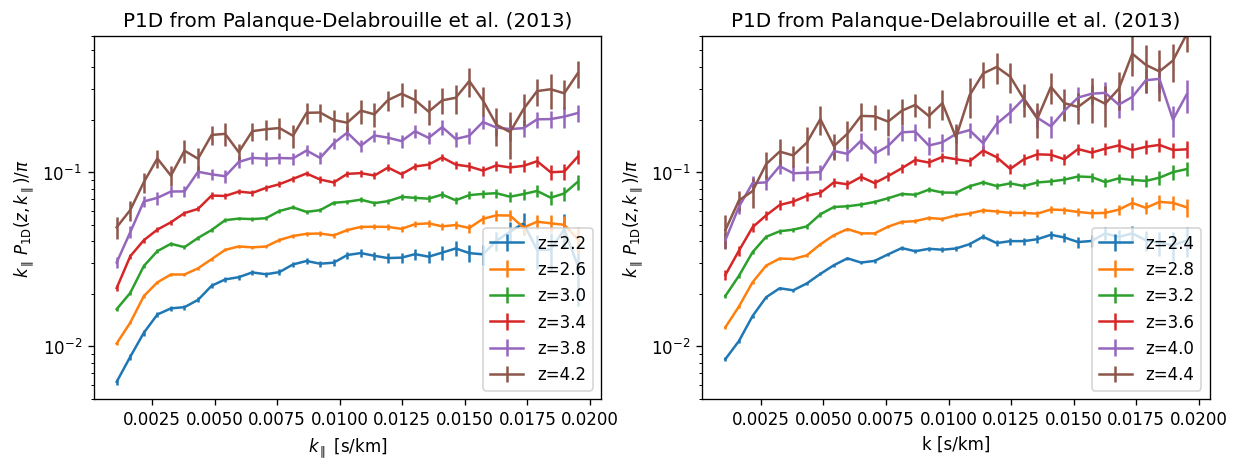

In [3]:
plt.figure(figsize=[12,4])
# first even bins
plt.subplot(1, 2, 1)
for i in range(0,Nz,2):
    Pk=p1d_2013.get_Pk_iz(i)
    cov=p1d_2013.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.yscale('log')
plt.legend()
plt.xlabel(r'$k_\parallel$ [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
plt.title('P1D from Palanque-Delabrouille et al. (2013)')
plt.ylim(0.005,0.6)
# then even bins
plt.subplot(1, 2, 2)
for i in range(1,Nz,2):
    Pk=p1d_2013.get_Pk_iz(i)
    cov=p1d_2013.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.yscale('log')
plt.legend()
plt.title('P1D from Palanque-Delabrouille et al. (2013)')
plt.xlabel('k [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
plt.ylim(0.005,0.6)

### Plot P1D from Chabanier et al (2019)

In [4]:
p1d_2019=data_Chabanier2019.P1D_Chabanier2019(add_syst=True)
z=p1d_2019.z
k=p1d_2019.k
Nz=len(z)
Nk=len(k)

Text(0, 0.5, '$k_\\parallel \\, P_{\\rm 1D}(z,k_\\parallel) / \\pi$')

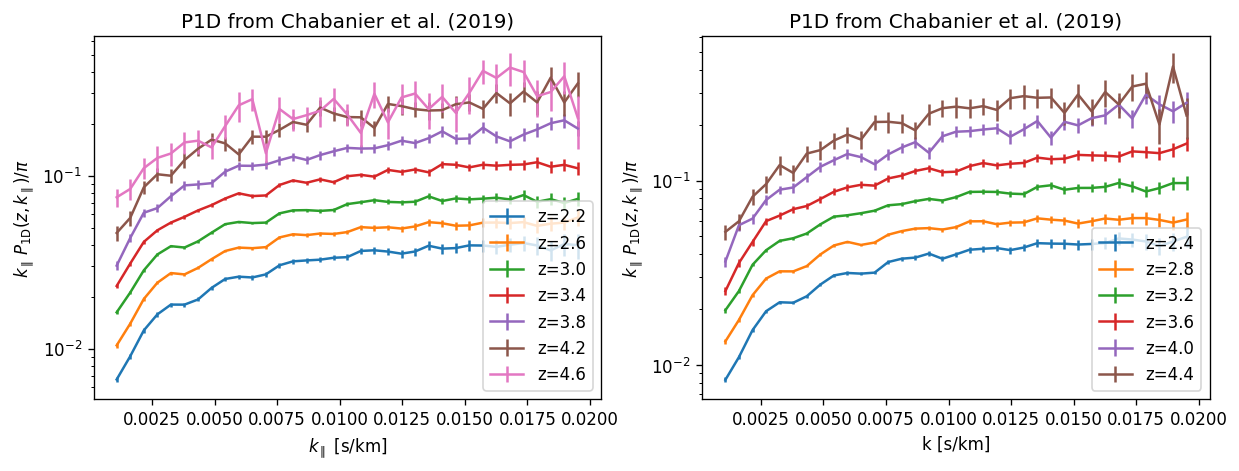

In [5]:
plt.figure(figsize=[12,4])
# first even bins
plt.subplot(1, 2, 1)
for i in range(0,Nz,2):
    Pk=p1d_2019.get_Pk_iz(i)
    cov=p1d_2019.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.yscale('log')
plt.legend()
plt.xlabel(r'$k_\parallel$ [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
plt.title('P1D from Chabanier et al. (2019)')
#plt.ylim(0.005,0.6)
# then even bins
plt.subplot(1, 2, 2)
for i in range(1,Nz,2):
    Pk=p1d_2019.get_Pk_iz(i)
    cov=p1d_2019.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.yscale('log')
plt.legend()
plt.title('P1D from Chabanier et al. (2019)')
plt.xlabel('k [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
#plt.ylim(0.005,0.6)

### Plot covariance matrices for one of the redshift bins

In [6]:
iz=6
cov_2013=p1d_2013.get_cov_iz(iz)
cov_2019=p1d_2019.get_cov_iz(iz)

Text(0.5, 1.0, 'Covariance matrix PD 2013')

<Figure size 960x960 with 0 Axes>

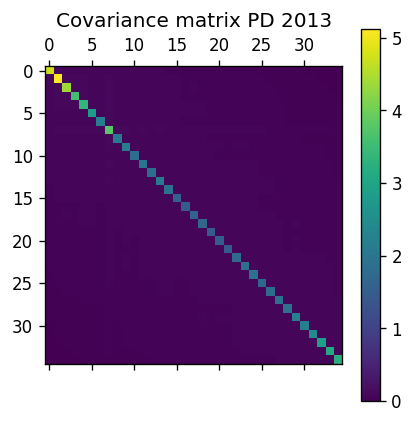

In [7]:
plt.figure(figsize=[8,8])
plt.matshow(cov_2013)
plt.colorbar()
plt.title('Covariance matrix PD 2013')

Text(0.5, 1.0, 'Covariance matrix Chabanier 2019')

<Figure size 960x960 with 0 Axes>

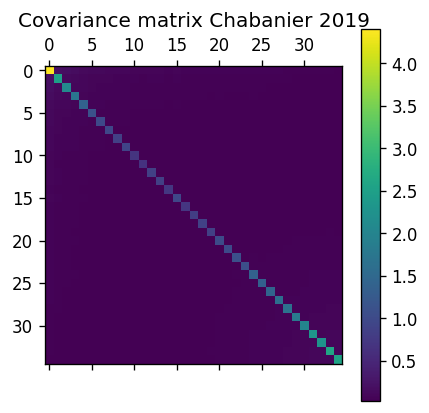

In [8]:
plt.figure(figsize=[8,8])
plt.matshow(cov_2019)
plt.colorbar()
plt.title('Covariance matrix Chabanier 2019')

In [9]:
def correlation_from_covariance(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

In [10]:
corr_2013=correlation_from_covariance(cov_2013)
corr_2019=correlation_from_covariance(cov_2019)

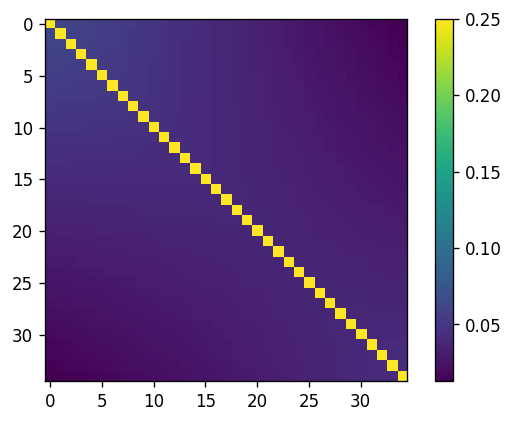

In [11]:
plt.imshow(corr_2019,vmax=0.25)
plt.colorbar()
plt.show()

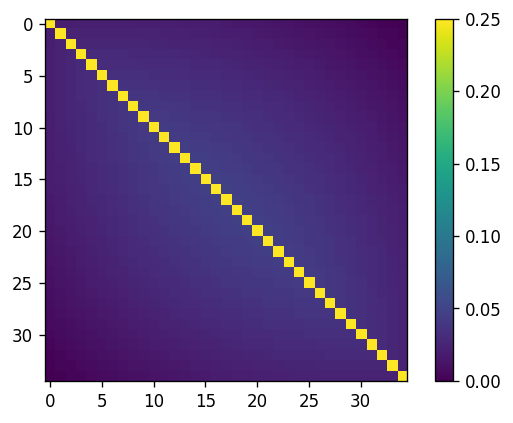

In [12]:
plt.imshow(corr_2013,vmax=0.25)
plt.colorbar()
plt.show()

## Read HIRES measurement by Naim (diagonal covariance for now)

In [13]:
p1d_HIRES=data_Karacayli_HIRES.P1D_Karacayli_HIRES()

Nz = 15 , Nk = 21


Text(0, 0.5, '$k_\\parallel \\, P_{\\rm 1D}(z,k_\\parallel) / \\pi$')

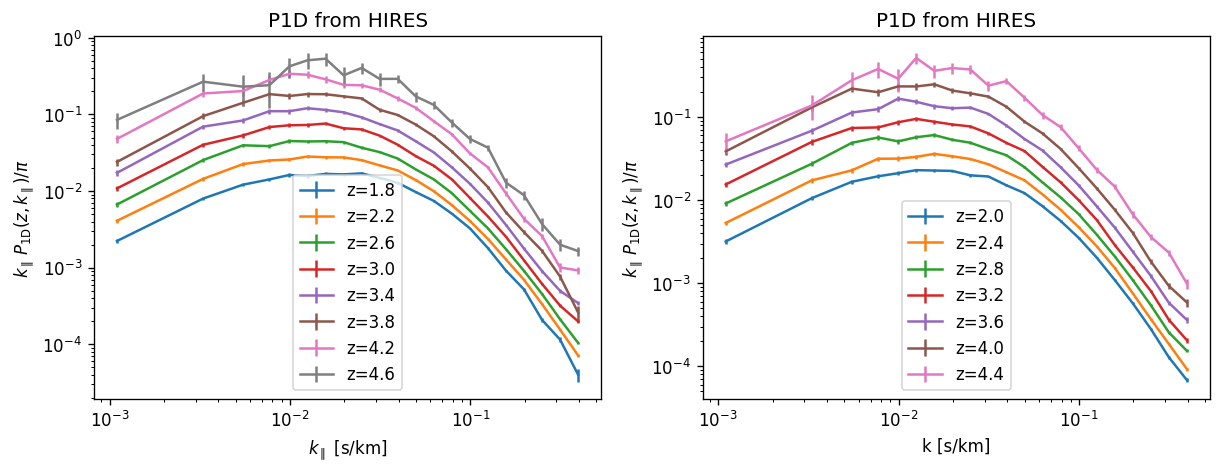

In [14]:
z=p1d_HIRES.z
k=p1d_HIRES.k
Nz=len(z)
Nk=len(k)
plt.figure(figsize=[12,4])
# first even bins
plt.subplot(1, 2, 1)
for i in range(0,Nz,2):
    Pk=p1d_HIRES.get_Pk_iz(i)
    cov=p1d_HIRES.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r'$k_\parallel$ [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
plt.title('P1D from HIRES')
#plt.ylim(0.005,0.6)
# then even bins
plt.subplot(1, 2, 2)
for i in range(1,Nz,2):
    Pk=p1d_HIRES.get_Pk_iz(i)
    cov=p1d_HIRES.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('P1D from HIRES')
plt.xlabel('k [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
#plt.ylim(0.005,0.6)

Text(0, 0.5, '$k_\\parallel \\, P_{\\rm 1D}(z,k_\\parallel) / \\pi$')

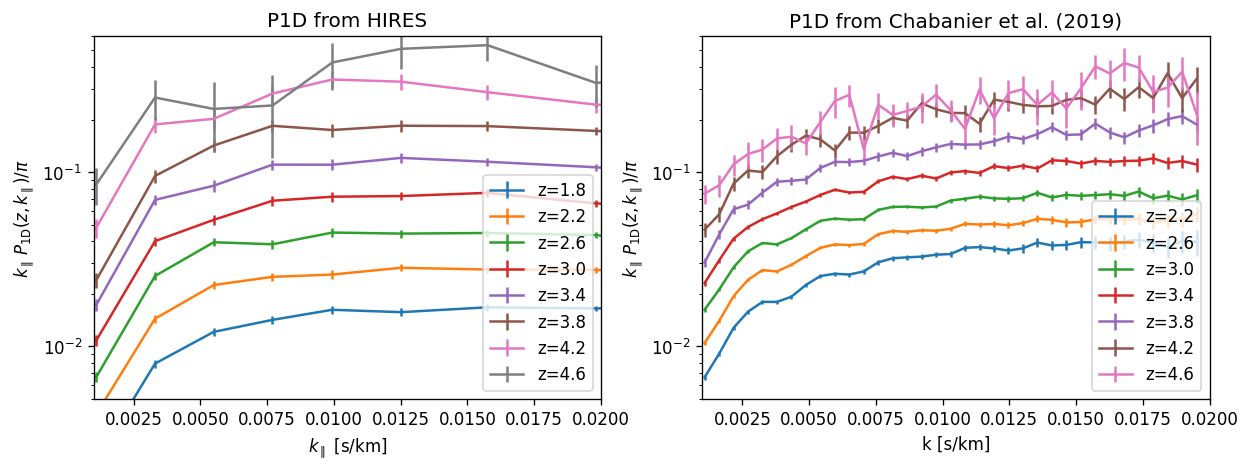

In [15]:
plt.figure(figsize=[12,4])
# first HIRES P1D
z=p1d_HIRES.z
k=p1d_HIRES.k
Nz=len(z)
Nk=len(k)
plt.subplot(1, 2, 1)
for i in range(0,Nz,2):
    Pk=p1d_HIRES.get_Pk_iz(i)
    cov=p1d_HIRES.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.yscale('log')
plt.xlim(0.001,0.02)
plt.ylim(0.005,0.6)
plt.legend()
plt.xlabel(r'$k_\parallel$ [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
plt.title('P1D from HIRES')
# then Chabanier
z=p1d_2019.z
k=p1d_2019.k
Nz=len(z)
Nk=len(k)
plt.subplot(1, 2, 2)
for i in range(0,Nz,2):
    Pk=p1d_2019.get_Pk_iz(i)
    cov=p1d_2019.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.yscale('log')
plt.xlim(0.001,0.02)
plt.ylim(0.005,0.6)
plt.legend()
plt.title('P1D from Chabanier et al. (2019)')
plt.xlabel('k [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')

Text(0, 0.5, '$\\sigma_{P} / P_{\\rm 1D}(z,k_\\parallel)$')

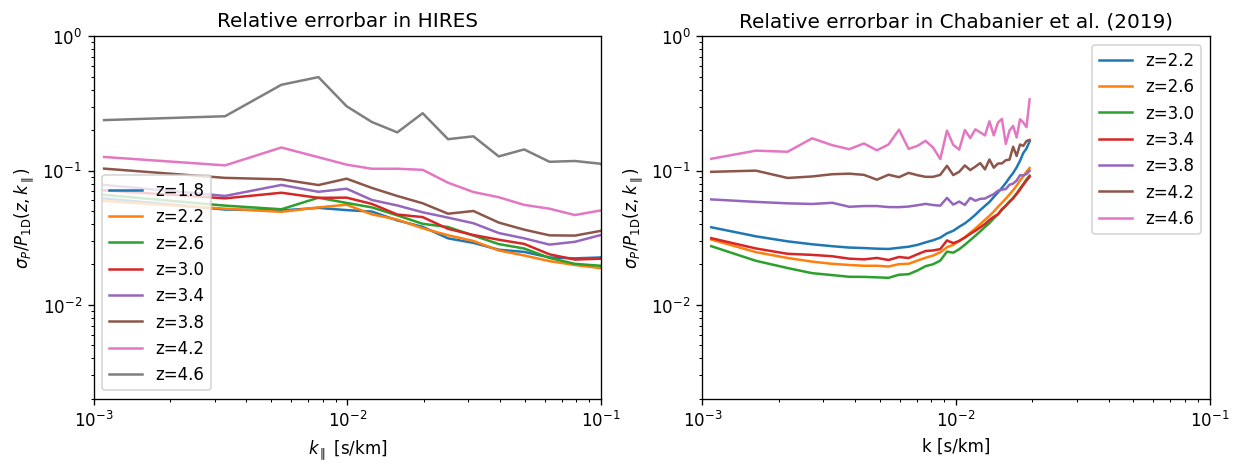

In [16]:
plt.figure(figsize=[12,4])
# first HIRES P1D
z=p1d_HIRES.z
k=p1d_HIRES.k
Nz=len(z)
Nk=len(k)
plt.subplot(1, 2, 1)
for i in range(0,Nz,2):
    Pk=p1d_HIRES.get_Pk_iz(i)
    cov=p1d_HIRES.get_cov_iz(i)
    rel_err=np.sqrt(np.diag(cov))/Pk
    plt.loglog(k,rel_err,label='z=%.1f'%z[i])
plt.xlim(0.001,0.1)
plt.ylim(0.002,1.0)
plt.legend()
plt.xlabel(r'$k_\parallel$ [s/km]')
plt.ylabel(r'$\sigma_{P} / P_{\rm 1D}(z,k_\parallel)$')
plt.title('Relative errorbar in HIRES')
# then Chabanier
z=p1d_2019.z
k=p1d_2019.k
Nz=len(z)
Nk=len(k)
plt.subplot(1, 2, 2)
for i in range(0,Nz,2):
    Pk=p1d_2019.get_Pk_iz(i)
    cov=p1d_2019.get_cov_iz(i)
    rel_err=np.sqrt(np.diag(cov))/Pk
    plt.loglog(k,rel_err,label='z=%.1f'%z[i])
plt.xlim(0.001,0.1)
plt.ylim(0.002,1.0)
plt.legend()
plt.title('Relative errorbar in Chabanier et al. (2019)')
plt.xlabel('k [s/km]')
plt.ylabel(r'$\sigma_{P} / P_{\rm 1D}(z,k_\parallel)$')

## Read DESI mock measurement by Naim (diagonal covariance for now)

In [17]:
p1d_DESI=data_Karacayli_DESI.P1D_Karacayli_DESI()

read Nz = 12 , Nk = 19
will only use 14 k bins below 0.04


Text(0, 0.5, '$k_\\parallel \\, P_{\\rm 1D}(z,k_\\parallel) / \\pi$')

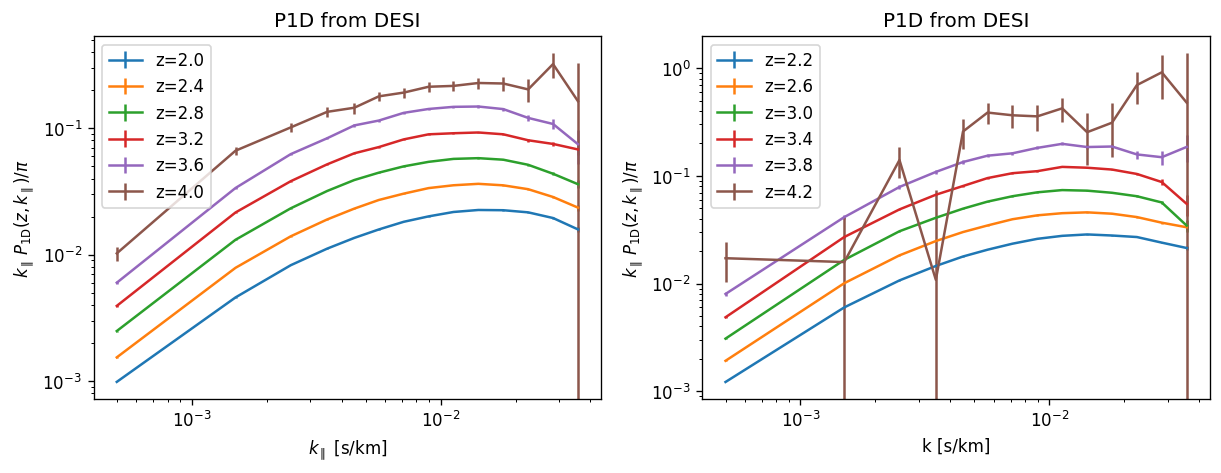

In [18]:
z=p1d_DESI.z
k=p1d_DESI.k
Nz=len(z)
Nk=len(k)
plt.figure(figsize=[12,4])
# first even bins
plt.subplot(1, 2, 1)
for i in range(0,Nz,2):
    Pk=p1d_DESI.get_Pk_iz(i)
    cov=p1d_DESI.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r'$k_\parallel$ [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
plt.title('P1D from DESI')
#plt.ylim(0.005,0.6)
# then even bins
plt.subplot(1, 2, 2)
for i in range(1,Nz,2):
    Pk=p1d_DESI.get_Pk_iz(i)
    cov=p1d_DESI.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('P1D from DESI')
plt.xlabel('k [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
#plt.ylim(0.005,0.6)

Text(0, 0.5, '$k_\\parallel \\, P_{\\rm 1D}(z,k_\\parallel) / \\pi$')

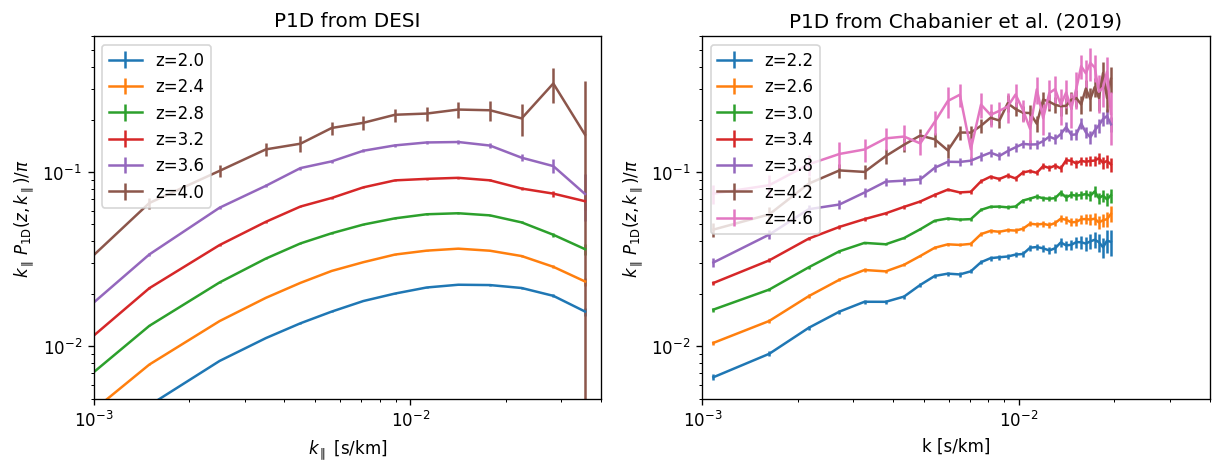

In [19]:
plt.figure(figsize=[12,4])
# first DESI P1D
z=p1d_DESI.z
k=p1d_DESI.k
Nz=len(z)
Nk=len(k)
plt.subplot(1, 2, 1)
for i in range(0,Nz,2):
    Pk=p1d_DESI.get_Pk_iz(i)
    cov=p1d_DESI.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.001,0.04)
plt.ylim(0.005,0.6)
plt.legend()
plt.xlabel(r'$k_\parallel$ [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
plt.title('P1D from DESI')
# then Chabanier
z=p1d_2019.z
k=p1d_2019.k
Nz=len(z)
Nk=len(k)
plt.subplot(1, 2, 2)
for i in range(0,Nz,2):
    Pk=p1d_2019.get_Pk_iz(i)
    cov=p1d_2019.get_cov_iz(i)
    plt.errorbar(k,Pk*k/np.pi,yerr=np.sqrt(np.diag(cov))*k/np.pi,label='z=%.1f'%z[i])
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.001,0.04)
plt.ylim(0.005,0.6)
plt.legend()
plt.title('P1D from Chabanier et al. (2019)')
plt.xlabel('k [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')

Text(0, 0.5, '$\\sigma_{P} / P_{\\rm 1D}(z,k_\\parallel)$')

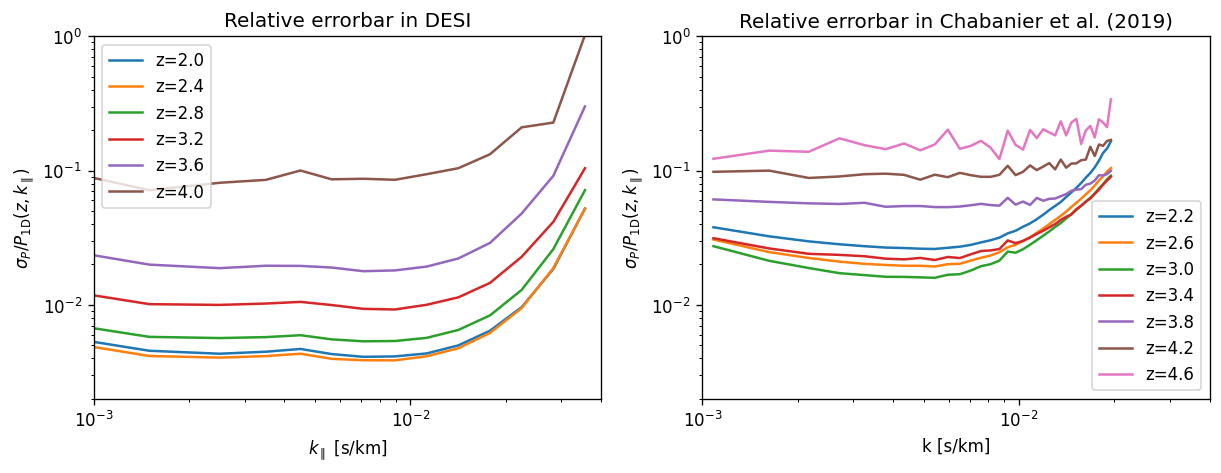

In [20]:
plt.figure(figsize=[12,4])
# first DESI P1D
z=p1d_DESI.z
k=p1d_DESI.k
Nz=len(z)
Nk=len(k)
plt.subplot(1, 2, 1)
for i in range(0,Nz,2):
    Pk=p1d_DESI.get_Pk_iz(i)
    cov=p1d_DESI.get_cov_iz(i)
    rel_err=np.sqrt(np.diag(cov))/Pk
    plt.loglog(k,rel_err,label='z=%.1f'%z[i])
plt.xlim(0.001,0.04)
plt.ylim(0.002,1.0)
plt.legend()
plt.xlabel(r'$k_\parallel$ [s/km]')
plt.ylabel(r'$\sigma_{P} / P_{\rm 1D}(z,k_\parallel)$')
plt.title('Relative errorbar in DESI')
# then Chabanier
z=p1d_2019.z
k=p1d_2019.k
Nz=len(z)
Nk=len(k)
plt.subplot(1, 2, 2)
for i in range(0,Nz,2):
    Pk=p1d_2019.get_Pk_iz(i)
    cov=p1d_2019.get_cov_iz(i)
    rel_err=np.sqrt(np.diag(cov))/Pk
    plt.loglog(k,rel_err,label='z=%.1f'%z[i])
plt.xlim(0.001,0.04)
plt.ylim(0.002,1.0)
plt.legend()
plt.title('Relative errorbar in Chabanier et al. (2019)')
plt.xlabel('k [s/km]')
plt.ylabel(r'$\sigma_{P} / P_{\rm 1D}(z,k_\parallel)$')